In [32]:
import pandas as pd
import datetime as dt
import yfinance as yf
import plotly.offline as pyo
import matplotlib.pyplot as plt
import numpy as np

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

In [34]:
stocklist = ['HDFCBANK.NS', 'ICICIBANK.NS']
stocklist

['HDFCBANK.NS', 'ICICIBANK.NS']

In [36]:
df = yf.download(stocklist, start='2012-01-01', end='2025-12-31')
df

C:\Users\KUNAL\anaconda3\Lib\site-packages\yfinance\scrapers\history.py:201: Pandas4Warning:

Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.

C:\Users\KUNAL\anaconda3\Lib\site-packages\yfinance\scrapers\history.py:201: Pandas4Warning:

Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.

[*********************100%***********************]  2 of 2 completed


Price            Close                     High                      Low  \
Ticker     HDFCBANK.NS ICICIBANK.NS HDFCBANK.NS ICICIBANK.NS HDFCBANK.NS   
Date                                                                       
2012-01-02   95.029961   108.549957   95.686717   109.009682   93.393623   
2012-01-03   97.768318   113.108276   98.157922   113.606962   95.731248   
2012-01-04   98.692245   115.804283   99.059592   116.723746   95.920496   
2012-01-05   98.770157   116.583481   99.449185   117.939283   98.024342   
2012-01-06  100.918541   117.144516  101.775671   118.905493   97.723794   
...                ...          ...         ...          ...         ...   
2025-12-24  997.200012  1359.800049  999.400024  1368.199951  993.000000   
2025-12-25  997.200012  1359.800049  997.200012  1359.800049  997.200012   
2025-12-26  992.099976  1350.400024  997.200012  1362.000000  987.700012   
2025-12-29  991.700012  1343.300049  997.400024  1355.699951  987.200012   
2025-12-30  990.900024  1342.500000  995.000000  1347.099976  982.200012   

Price                          Open                   Volume               
Ticker     ICICIBANK.NS HDFCBANK.NS ICICIBANK.NS HDFCBANK.NS ICICIBANK.NS  
Date                                                                       
2012-01-02   106.765596   95.486351   107.552586     7029996     14927627  
2012-01-03   109.866819   96.042929   109.866819     6878476     18500311  
2012-01-04   113.825130   98.380564   114.292649     9742956     32952243  
2012-01-05   115.165333   98.848079   116.100372     6761212     23203350  
2012-01-06   113.451116   98.180185   115.632869     7954444     22273933  
...                 ...         ...          ...         ...          ...  
2025-12-24  1357.599976  993.000000  1363.800049    13699996      8955140  
2025-12-25  1359.800049  997.200012  1359.800049           0            0  
2025-12-26  1348.500000  996.000000  1356.500000     9360853      2812144  
2025-12-29  1341.500000  993.099976  1352.099976    13545749      6057201  
2025-12-30  1338.099976  990.200012  1343.300049    33155849     18621277  

[3454 rows x 10 columns]

In [37]:
df.Close

Ticker,HDFCBANK.NS,ICICIBANK.NS
Date,,
2012-01-02,95.029961,108.549957
2012-01-03,97.768318,113.108276
2012-01-04,98.692245,115.804283
2012-01-05,98.770157,116.583481
2012-01-06,100.918541,117.144516
...,...,...
2025-12-24,997.200012,1359.800049
2025-12-25,997.200012,1359.800049
2025-12-26,992.099976,1350.400024


# Log Normal Daily Returns

In [41]:
log_returns = np.log(df.Close / df.Close.shift(1)).dropna()
log_returns*100

Ticker,HDFCBANK.NS,ICICIBANK.NS
Date,,
2012-01-03,2.840836,4.113506
2012-01-04,0.940580,2.355599
2012-01-05,0.078913,0.670604
2012-01-06,2.151816,0.480076
2012-01-09,0.528072,-0.520167
...,...,...
2025-12-24,0.060190,-0.235049
2025-12-25,0.000000,0.000000
2025-12-26,-0.512748,-0.693680


# Calculating Daily Cumulative Returns

In [44]:
daily_cum_returns = (log_returns + 1).cumprod()
daily_cum_returns

Ticker,HDFCBANK.NS,ICICIBANK.NS
Date,,
2012-01-03,1.028408,1.041135
2012-01-04,1.038081,1.065660
2012-01-05,1.038901,1.072806
2012-01-06,1.061256,1.077957
2012-01-09,1.066860,1.072349
...,...,...
2025-12-24,7.412422,6.589196
2025-12-25,7.412422,6.589196
2025-12-26,7.374415,6.543488


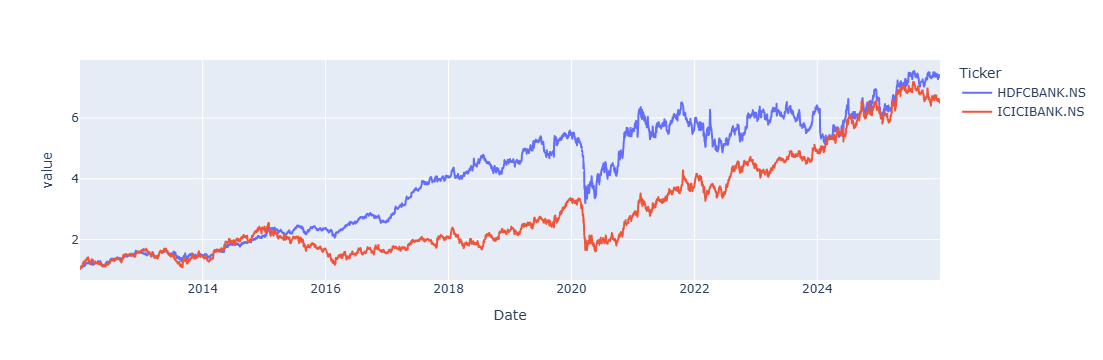

In [46]:
daily_cum_returns.plot()

In [50]:
daily_cum_returns.plot()
plt.show()